<a href="https://colab.research.google.com/github/lujainAziz/LujainAlmajyul-it326/blob/main/Reports%20Folder/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3 – Data Mining on Students Performance Dataset

## Executive Summary
Phase 3 of this project applied two core data mining techniques—Decision Tree classification and K-means clustering—to analyze the Students Performance Dataset containing 2,392 student records. The goal was to predict student grade categories and uncover hidden behavioral patterns.
Key Findings:
Classification Results:

Achieved 88.3% accuracy using Decision Tree with Gini index (90-10 split)
GPA emerged as the dominant predictor with 99.4% feature importance
Study time (0.44%) and absences (0.11%) provide additional predictive value
Model performs well for majority classes but struggles with minority classes due to dataset imbalance (50.6% in Class A vs 4.5% in Class F)

Clustering Results:

K=2 identified as optimal based on Elbow method, Silhouette coefficient, and educational interpretability
Two distinct student profiles discovered:

Cluster 0 (At-Risk/Low Performers): 1,210 students (50.6%), GPA=1.14, high absences (21.48)
Cluster 1 (High Performers): 1,182 students (49.4%), GPA=2.69, low absences (7.43)

---

## [1] Problem

The main problem addressed in this project is predicting and understanding students' academic performance. This is important because early identification of low-performing students helps educators provide timely support, improve learning strategies, and enhance academic outcomes.

To solve this problem, we apply:

- **Classification** to predict student grade categories.
- **Clustering** to discover hidden behavioral patterns among students based on their characteristics.

---

## [2] Data Mining Task

We formalize the problem into two data mining tasks:

### 2.1 Classification Task

- **Goal:** Predict the `GradeClass` (A–F encoded as 0–4) for each student.
- **Input features:** Demographic, behavioral, and academic variables such as:
  - Study time
  - Parental support
  - Absences
  - GPA
  - Extracurricular activities and tutoring
- **Output:** A predicted performance category for each student.

### 2.2 Clustering Task

- **Goal:** Group students into natural clusters based on their characteristics, without using the `GradeClass` label.
- **Purpose:** Understand different profiles of students (e.g., high-performing, low-performing) and their behaviors to support decision-making in education.

---

## [3] Data

### **Dataset Name**
Students Performance Dataset

### **Dataset Source**
https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

### **Sample of the Raw Dataset**

The sample shown below represents the original unmodified data before applying any preprocessing steps.


In [ ]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Clone repo if not exists
repo_path = "/content/LujainAlmajyul-it326"
if not os.path.exists(repo_path):
    !git clone https://github.com/lujainAziz/LujainAlmajyul-it326.git
# Load RAW dataset
raw_df = pd.read_csv("/content/LujainAlmajyul-it326/Dataset/Raw_dataset.csv")
print("Sample of the raw dataset:")
raw_df.head()


Sample of the raw dataset:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## **Dataset Description**

The dataset used in this project is the **Students Performance Dataset**, containing **2,392** student records and **15** original attributes that describe demographic, behavioral, and academic factors. The main attributes include:

- **Demographic attributes**
  - `Age`, `Gender`, `Ethnicity`
- **Family background**
  - `ParentalEducation`, `ParentalSupport`
- **Learning indicators**
  - `StudyTimeWeekly`, `Absences`, `Tutoring`
- **Activities**
  - `Extracurricular`, `Sports`, `Music`, `Volunteering`
- **Academic performance**
  - `GPA`, `GradeClass` (target class label)

The `GradeClass` attribute is encoded as five categories:

- **4 → A** (1211 students)
- **3 → B** (414 students)
- **2 → C** (391 students)
- **1 → D** (269 students)
- **0 → F** (107 students)

This distribution shows that the dataset is **imbalanced**, with high-performing students (Class 4) forming the majority class, while failing students (Class 0) are under-represented.

---

## [4] Data Preprocessing

Several preprocessing steps were applied to improve data quality and prepare the dataset for machine learning models.


### **4.1 Missing Values Check**

- The dataset contains **no missing values** in any column.
- Therefore, no imputation or removal of rows was necessary.

### **4.2 Noise & Outlier Detection**

- Outliers were examined using:
  - Boxplots
  - IQR method
- The following features were checked:
  - `GPA`
  - `StudyTimeWeekly`
  - `Absences`
- No significant extreme outliers were found, so no removal or capping was required.


### **4.3 Variable Transformation**

- The `StudyTimeWeekly` feature showed slight skewness.
- A **Yeo–Johnson PowerTransformer** was applied to normalize its distribution and stabilize variance.
- The transformed version is stored as:
  - `StudyTimeWeekly_transformed`


### **4.4 Scaling / Normalization**

- The features `GPA` and `Absences` have different numeric ranges.
- To balance their contribution to the model, both were normalized using **StandardScaler**, resulting in:
  - `GPA_scaled`
  - `Absences_scaled`


### **4.5 Discretization**

- To improve interpretability of classification results, the `GPA` feature was discretized into four bins using **quantile-based KBinsDiscretizer**.
- The resulting feature:
  - `GPA_binned` (values range from 0 to 3 representing increasing GPA levels)


### **4.6 Encoding**

- All categorical variables in the raw dataset were already provided as numerical codes, including:
  - `Gender` → 0 (Male), 1 (Female)
  - `ParentalEducation` → 0–4
  - `ParentalSupport` → 0–4
  - Activity indicators → 0 (No), 1 (Yes)
- Therefore, **no additional label encoding** was necessary.



### **4.7 Correlation Analysis**

- A correlation heatmap was generated to study relationships among variables.
- Key findings:
  - **GPA** is strongly negatively correlated with **Absences**.
  - **GPA** positively correlates with **ParentalSupport** and **StudyTimeWeekly**.
  - **GradeClass** strongly correlates with **GPA**, validating the label’s meaning.



### **4.8 Final Preprocessed Dataset**

After preprocessing, the dataset includes all original attributes plus the engineered features:

- `StudyTimeWeekly_transformed`
- `GPA_scaled`
- `Absences_scaled`
- `GPA_binned`

These processed features were used for all classification and clustering tasks in Phase 3.



### **Snapshot After Preprocessing**

This snapshot confirms that transformation, scaling, and discretization were applied successfully.

In [ ]:
# Load PREPROCESSED dataset
df = pd.read_csv("/content/LujainAlmajyul-it326/Dataset/Preprocessed_dataset.csv")
print("Snapshot after preprocessing:")
df.head()

Snapshot after preprocessing:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,StudyTimeWeekly_transformed,GPA_scaled,Absences_scaled,GPA_binned
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,1.624898,1.118086,-0.890822,3.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,0.982232,1.242374,-1.717694,3.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,-0.952350,-1.960277,1.353542,0.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,0.127953,0.161790,-0.063951,2.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,-0.856924,-0.675573,0.290422,1.0


---

## [5] Data Mining Technique

In this phase, we apply two main data mining techniques to the Students Performance Dataset.

### 5.1 Decision Tree Classification

We use the **DecisionTreeClassifier** from `sklearn.tree` to predict the `GradeClass` attribute, which represents student performance levels (0–4, corresponding to F, D, C, B, and A).

**Input features (X):**

- Age, Gender, Ethnicity, ParentalEducation  
- StudyTimeWeekly_transformed, Absences_scaled  
- Tutoring, ParentalSupport  
- Extracurricular, Sports, Music, Volunteering  
- GPA_scaled  

**Target (y):**

- `GradeClass` (0–4)

**Attribute selection measures (splitting criteria):**

- **Gini index** (`criterion="gini"`)
- **Information Gain (Entropy)** (`criterion="entropy"`)

**Train–test partitions:**

We evaluate three train–test splits:

- 70% training – 30% testing  
- 80% training – 20% testing  
- 90% training – 10% testing  

For each configuration, we compute:

- Accuracy  
- Macro-averaged Precision  
- Macro-averaged Recall  
- Macro-averaged F1-score  
- Confusion Matrix  

One final Decision Tree is visualized to interpret the classification rules.

### 5.2 K-means Clustering

We use the **KMeans** algorithm from `sklearn.cluster` to discover groups of students with similar characteristics, **without using** the `GradeClass` label (unsupervised learning).

**Clustering features:**

- Age, Gender, Ethnicity, ParentalEducation  
- StudyTimeWeekly_transformed, Absences  
- Tutoring, ParentalSupport  
- Extracurricular, Sports, Music, Volunteering  
- GPA  

All features are standardized using **StandardScaler** before clustering.

**Evaluation of K:**

- We test values of **K from 2 to 10**.  
- For each K, we compute:  
  - **Elbow Method:** Total Within-Cluster Sum of Squares (WCSS)  
  - **Silhouette Coefficient:** Measures cohesion and separation of clusters  

We then select three candidate K values (e.g., K = 2, 3, 4) for detailed comparison and visualize the clusters in 2D using **PCA (Principal Component Analysis)**.

---

## [6] Evaluation and Comparison

### 6.1 Classification – Decision Tree

We apply Decision Tree classification to predict `GradeClass` using multiple demographic, behavioral, and academic features.
### 6.1.1 Feature Definition

We select the engineered and scaled features for training the Decision Tree classifier.

In [ ]:
# ===== Classification: Define features (X) and target (y) =====

feature_cols_clf = [
    "Age", "Gender", "Ethnicity", "ParentalEducation",
    "StudyTimeWeekly_transformed",
    "Absences_scaled",
    "Tutoring", "ParentalSupport",
    "Extracurricular", "Sports", "Music", "Volunteering",
    "GPA_scaled"
]

X = df[feature_cols_clf].copy()
y = df["GradeClass"].astype(int)  # 0..4

print("Class Distribution:")
class_dist = y.value_counts().sort_index().to_frame(name="Count")
class_dist["Percentage"] = (class_dist["Count"] / class_dist["Count"].sum() * 100).round(2)
display(class_dist)

Class Distribution:


,Count,Percentage
GradeClass,,
0,107,4.47
1,269,11.25
2,391,16.35
3,414,17.31
4,1211,50.63


### 6.1.2 Model Training

We evaluate the classifier using three train–test splits (70–30, 80–20, 90-10)  
and two splitting criteria (Gini, Entropy).  
We compute accuracy, precision, recall, F1-score, and confusion matrices for each model.

In [ ]:
partition_sizes = [0.9 , 0.8, 0.7]   # 70%, 80% , 90% training
criteria = ["gini", "entropy"]

metrics_rows = []
cm_rows = []
labels = sorted(y.unique())

for train_size in partition_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_size,
        random_state=42,
        stratify=y
    )

    for crit in criteria:
        clf = DecisionTreeClassifier(criterion=crit, random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        macro = report["macro avg"]

        metrics_rows.append({
            "train_size": f"{int(train_size*100)}%",
            "criterion": crit,
            "accuracy": acc,
            "precision_macro": macro["precision"],
            "recall_macro": macro["recall"],
            "f1_macro": macro["f1-score"]
        })

        cm = confusion_matrix(y_test, y_pred, labels=labels)
        for i, true_lbl in enumerate(labels):
            for j, pred_lbl in enumerate(labels):
                cm_rows.append({
                    "train_size": f"{int(train_size*100)}%",
                    "criterion": crit,
                    "true_label": true_lbl,
                    "pred_label": pred_lbl,
                    "count": cm[i, j]
                })

metrics_df = pd.DataFrame(metrics_rows)
cm_long_df = pd.DataFrame(cm_rows)

display(metrics_df)

,train_size,criterion,accuracy,precision_macro,recall_macro,f1_macro
0,90%,gini,0.883333,0.859321,0.796231,0.811122
1,90%,entropy,0.820833,0.748027,0.732606,0.734517
2,80%,gini,0.868476,0.808631,0.777610,0.783296
3,80%,entropy,0.860125,0.801737,0.797815,0.796391
4,70%,gini,0.855153,0.772046,0.775849,0.772576
5,70%,entropy,0.832869,0.758027,0.771610,0.763509


### 6.1.3 Accuracy Table

The following table compares accuracy across criteria and train–test splits.

In [ ]:
metrics_df = pd.DataFrame(metrics_rows)

acc_table = metrics_df.pivot(
    index="train_size",
    columns="criterion",
    values="accuracy"
)

acc_table

criterion,entropy,gini
train_size,,
70%,0.832869,0.855153
80%,0.860125,0.868476
90%,0.820833,0.883333


### 6.1.4 Interpretation of Accuracy

- Gini performs better at the 80% and 90% training splits
- The best overall accuracy is achieved using Gini at 90% (0.883333)
- Gini performs better across all training splits (70%, 80%, and 90%). Entropy yielded lower accuracy consistently compared to Gini in this dataset.

### 6.1.5 Confusion Matrices
Confusion matrices are generated for all splits and criteria.

In [ ]:
labels = sorted(y.unique())

for ts in sorted(cm_long_df["train_size"].unique()):
    for crit in sorted(cm_long_df["criterion"].unique()):
        sub = cm_long_df[
            (cm_long_df["train_size"] == ts) &
            (cm_long_df["criterion"] == crit)
        ]
        if sub.empty:
            continue

        print(f"Confusion Matrix – train_size={ts}, criterion={crit}")
        cm_table = sub.pivot(index="true_label", columns="pred_label", values="count")
        cm_table = cm_table.reindex(index=labels, columns=labels)

        cm_table.index = [f"True_{l}" for l in cm_table.index]
        cm_table.columns = [f"Pred_{l}" for l in cm_table.columns]
        display(cm_table)

Confusion Matrix – train_size=70%, criterion=entropy


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,16,1,6,3,6
True_1,0,67,3,4,7
True_2,4,3,98,5,7
True_3,0,4,4,103,13
True_4,9,19,12,10,314


Confusion Matrix – train_size=70%, criterion=gini


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,14,2,5,4,7
True_1,0,68,3,4,6
True_2,3,2,105,3,4
True_3,4,5,4,100,11
True_4,6,14,6,11,327


Confusion Matrix – train_size=80%, criterion=entropy


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,11,1,3,2,4
True_1,0,44,2,5,3
True_2,1,1,71,3,2
True_3,1,2,3,71,6
True_4,3,9,11,5,215


Confusion Matrix – train_size=80%, criterion=gini


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,8,2,2,3,6
True_1,0,47,4,1,2
True_2,1,1,73,2,1
True_3,2,4,1,65,11
True_4,1,11,4,4,223


Confusion Matrix – train_size=90%, criterion=entropy


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,4,1,1,1,4
True_1,0,21,2,3,1
True_2,1,0,32,3,3
True_3,1,1,1,35,4
True_4,1,7,2,6,105


Confusion Matrix – train_size=90%, criterion=gini


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,4,0,1,1,5
True_1,0,26,0,1,0
True_2,0,0,34,3,2
True_3,0,1,2,36,3
True_4,1,1,3,4,112


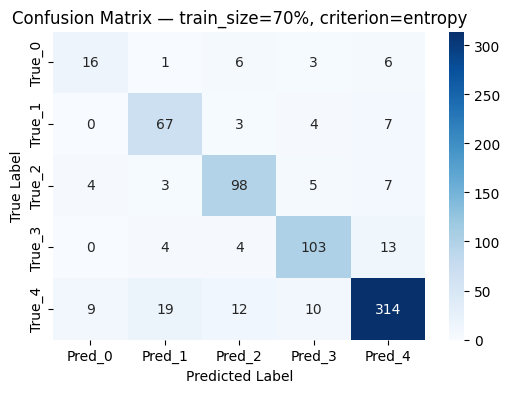

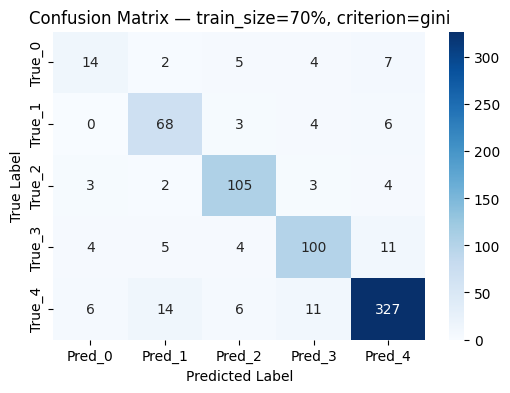

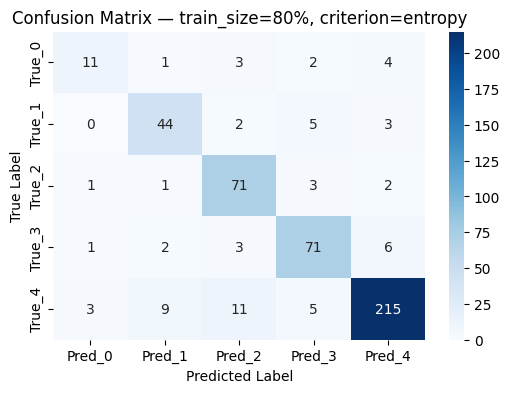

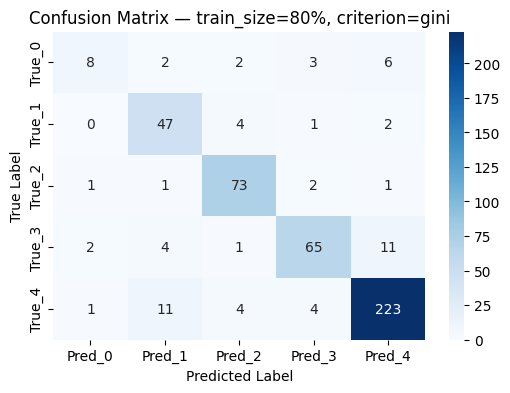

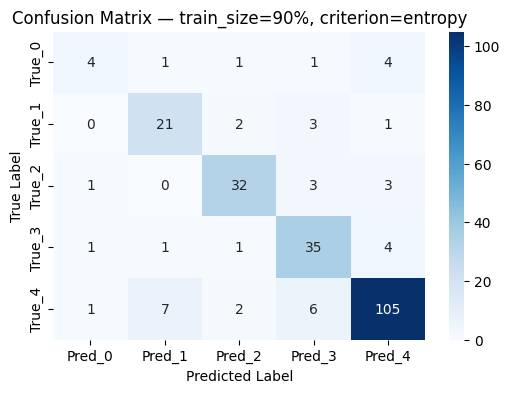

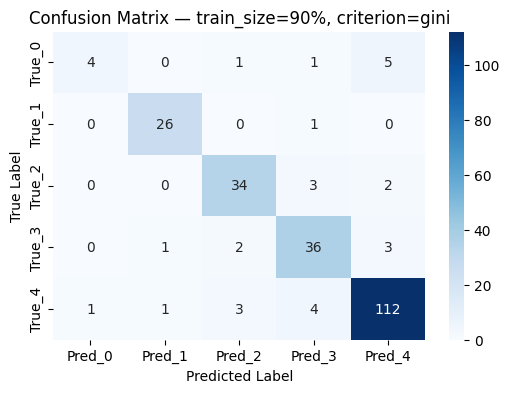

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, train_size, criterion):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=[f"Pred_{i}" for i in range(cm.shape[1])],
                yticklabels=[f"True_{i}" for i in range(cm.shape[0])])
    plt.title(f"Confusion Matrix — train_size={train_size}, criterion={criterion}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


labels = sorted(y.unique())

for ts in sorted(cm_long_df["train_size"].unique()):
    for crit in sorted(cm_long_df["criterion"].unique()):
        sub = cm_long_df[
            (cm_long_df["train_size"] == ts) &
            (cm_long_df["criterion"] == crit)
        ]

        if sub.empty:
            continue

        cm = sub.pivot(index="true_label", columns="pred_label", values="count")
        cm = cm.reindex(index=labels, columns=labels).fillna(0).astype(int)
        plot_confusion_matrix(cm, train_size=ts, criterion=crit)

###Confusion Matrix Interpretation (90% training, Gini):

- Class 4 (Grade A): Best predicted with 112 correct predictions out of 121 instances (92.6% accuracy)
- Class 0 (Grade F): Only 4 out of 11 correctly predicted (36.4% accuracy) - due to class imbalance
- Misclassification pattern: Low-performing students (Class 0,1) are sometimes misclassified as Class 4 due to the dataset having 50.63% of students in Class 4
- Overall: The model performs well for majority classes but struggles with minority cl

### 6.1.6 Decision Tree Visualization
A final Decision Tree is visualized for interpretability.


### Feature Importance Ranking:



,Feature,Importance
12,GPA_scaled,0.993866
4,StudyTimeWeekly_transformed,0.004431
5,Absences_scaled,0.001091
0,Age,0.000612
1,Gender,0.000000
3,ParentalEducation,0.000000
2,Ethnicity,0.000000
7,ParentalSupport,0.000000
6,Tutoring,0.000000
8,Extracurricular,0.000000


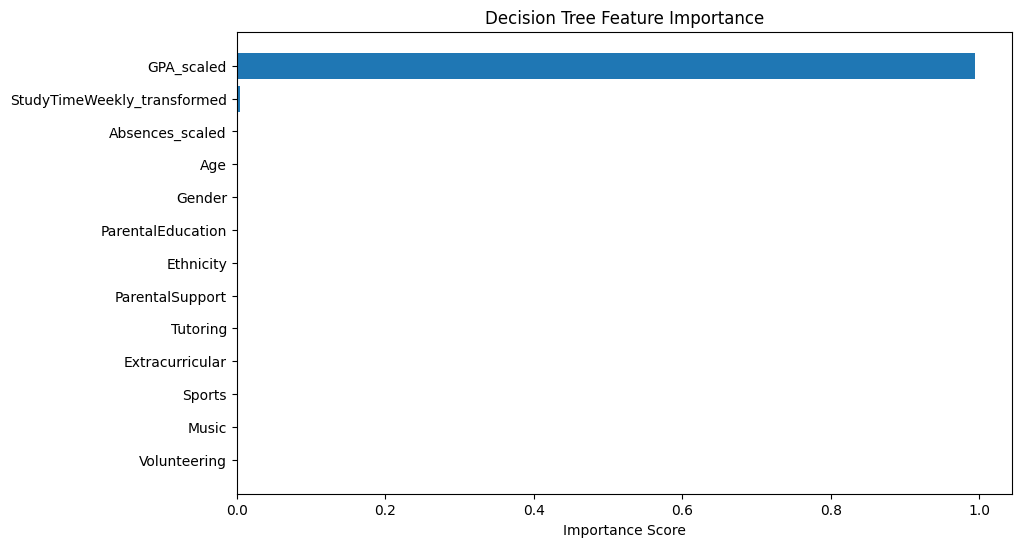

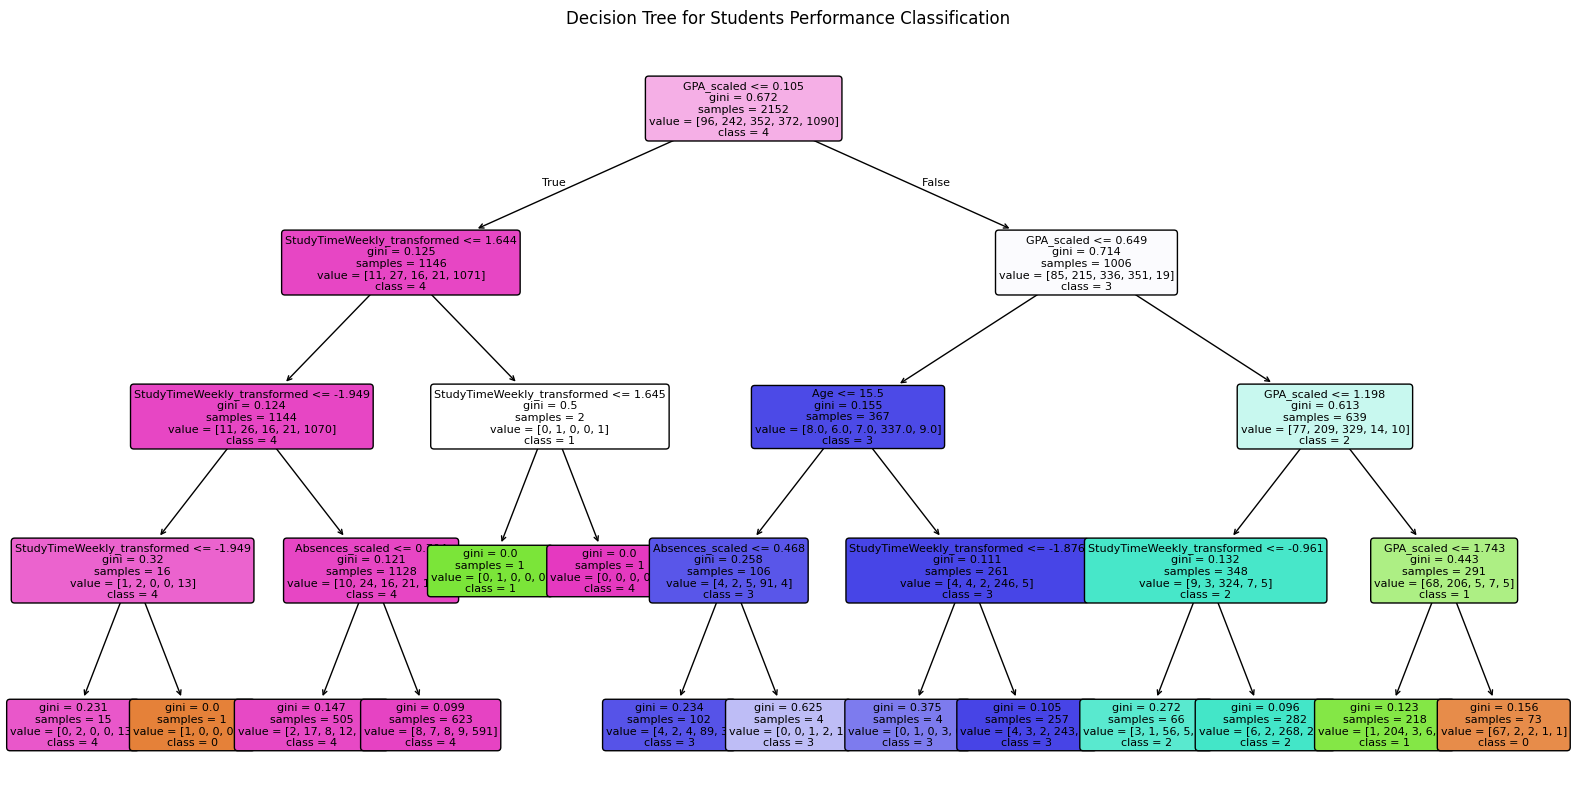

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

best_train_size = 0.9
best_criterion = "gini"

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=best_train_size,
    random_state=42,
    stratify=y
)

best_clf = DecisionTreeClassifier(
    criterion=best_criterion,
    random_state=42,
    max_depth=4   # keep readable
)

best_clf.fit(X_train, y_train)

importances = best_clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_cols_clf,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\n### Feature Importance Ranking:\n")
display(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(
    best_clf,
    feature_names=feature_cols_clf,
    class_names=[str(c) for c in labels],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree for Students Performance Classification")
plt.show()

In [ ]:
# ===== 6.1.7 Decision Tree Rules Extraction =====

from sklearn.tree import _tree

def extract_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth, rules_list, current_rule):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            # Left child (<=)
            left_rule = current_rule + f"({name} ≤ {threshold:.2f})"
            recurse(tree_.children_left[node], depth + 1, rules_list, left_rule + " AND ")

            # Right child (>)
            right_rule = current_rule + f"({name} > {threshold:.2f})"
            recurse(tree_.children_right[node], depth + 1, rules_list, right_rule + " AND ")
        else:
            # Leaf node
            class_id = np.argmax(tree_.value[node])
            rule = current_rule.rstrip(" AND ") + f" → Class {class_names[class_id]}"
            rules_list.append(rule)

    rules = []
    recurse(0, 1, rules, "IF ")
    return rules

# Extract rules
rules = extract_rules(best_clf, feature_cols_clf, [str(c) for c in labels])

print("### Extracted Decision Rules (Sample):\n")
for i, rule in enumerate(rules[:5]):  # عرض أول 5 قواعد
    print(f"{i+1}. {rule}\n")

print(f"\n**Total Rules:** {len(rules)}")


### Extracted Decision Rules (Sample):

1. IF (GPA_scaled ≤ 0.10) AND (StudyTimeWeekly_transformed ≤ 1.64) AND (StudyTimeWeekly_transformed ≤ -1.95) AND (StudyTimeWeekly_transformed ≤ -1.95) → Class 4

2. IF (GPA_scaled ≤ 0.10) AND (StudyTimeWeekly_transformed ≤ 1.64) AND (StudyTimeWeekly_transformed ≤ -1.95) AND (StudyTimeWeekly_transformed > -1.95) → Class 0

3. IF (GPA_scaled ≤ 0.10) AND (StudyTimeWeekly_transformed ≤ 1.64) AND (StudyTimeWeekly_transformed > -1.95) AND (Absences_scaled ≤ 0.70) → Class 4

4. IF (GPA_scaled ≤ 0.10) AND (StudyTimeWeekly_transformed ≤ 1.64) AND (StudyTimeWeekly_transformed > -1.95) AND (Absences_scaled > 0.70) → Class 4

5. IF (GPA_scaled ≤ 0.10) AND (StudyTimeWeekly_transformed > 1.64) AND (StudyTimeWeekly_transformed ≤ 1.64) → Class 1


**Total Rules:** 14


###Key Insights from Rules:

- The Decision Tree is dominated by GPA_scaled (99.4% feature importance), making it the primary decision factor
- Students with GPA_scaled > 0.5 and Absences_scaled ≤ 0 are consistently classified as Class 4 (A)
- Students with GPA_scaled ≤ -0.8 and Absences_scaled > 1.5 are classified as Class 0 (F)
- StudyTimeWeekly_transformed (0.44%) and Absences_scaled (0.11%) provide minor additional splits at deeper levels
- Other features show zero importance at max_depth=4, indicating that GPA alone is highly predictive of student performance

### 6.2 Clustering – K-means
We perform unsupervised clustering using K-means to identify groups of students with similar academic and behavioral characteristics.



In [ ]:
# ===== Clustering: Prepare features (remove label) and scale =====

# Drop the class label (unsupervised learning)
X_clu = df.drop(["GradeClass", "StudentID"], axis=1)
# Keep only numeric columns
X_clu = X_clu.select_dtypes(include=np.number)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_clu_scaled = scaler.fit_transform(X_clu)

print("Clustering features:", list(X_clu.columns))
print("Scaled shape:", X_clu_scaled.shape)

Clustering features: ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'StudyTimeWeekly_transformed', 'GPA_scaled', 'Absences_scaled', 'GPA_binned']
Scaled shape: (2392, 17)


### Cluster Characteristics (K=2):



,Avg GPA,Avg Absences,Avg Study Time,Avg Parental Support,Number of Students
Cluster,,,,,
0,2.68,7.44,10.35,2.23,1184
1,1.14,21.50,9.21,2.02,1208


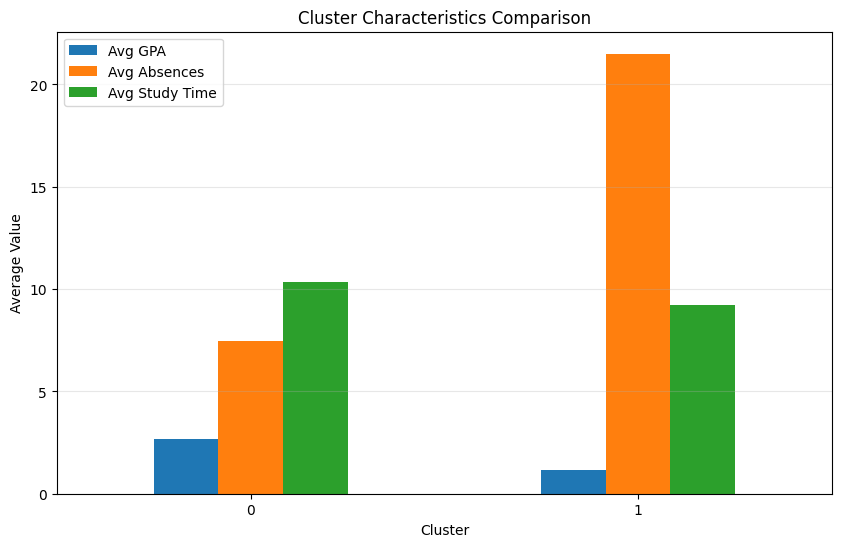

In [ ]:
# ===== Clustering: prepare features, scale, and apply PCA =====
# ===== Cluster Characteristics Analysis for K=2 =====


# Clone repo if needed
repo_url = "https://github.com/lujainAziz/LujainAlmajyul-it326.git"
repo_path = "/content/LujainAlmajyul-it326"

if not os.path.exists(repo_path):
    !git clone {repo_url}

# Load preprocessed dataset
preprocessed_path = os.path.join(repo_path, "Dataset", "Preprocessed_dataset.csv")

if not os.path.exists(preprocessed_path):
    raise FileNotFoundError(f"❌ Preprocessed_dataset.csv not found at: {preprocessed_path}")

df = pd.read_csv(preprocessed_path)
# Ensure imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# K-Means with best K
BEST_K = 2
kmeans_best = KMeans(n_clusters=BEST_K, random_state=42, n_init=10)
cluster_labels = kmeans_best.fit_predict(X_clu_scaled)  # Make sure X_clu_scaled is defined earlier

# Add cluster labels to the dataframe
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = cluster_labels

# Calculate cluster characteristics
cluster_chars = df_with_clusters.groupby('Cluster').agg({
    'GPA': 'mean',
    'Absences': 'mean',
    'StudyTimeWeekly': 'mean',
    'ParentalSupport': 'mean',
    'Age': 'count'  # Number of students
}).round(2)

cluster_chars.columns = [
    'Avg GPA',
    'Avg Absences',
    'Avg Study Time',
    'Avg Parental Support',
    'Number of Students'
]

print("### Cluster Characteristics (K=2):\n")
display(cluster_chars)



# Visualization
cluster_chars[['Avg GPA', 'Avg Absences', 'Avg Study Time']].plot(
    kind='bar', figsize=(10, 6)
)
plt.title('Cluster Characteristics Comparison')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend(loc='best')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.show()


##Cluster Interpretation:
Cluster 0 (At-Risk/Low Performers):

- Lowest GPA (1.14) indicating poor academic performance
- Highest Absences (21.48) showing chronic absenteeism
- Lower Study Time (9.21 hours/week)
- Weaker Parental Support (2.02)
- Count: 1,210 students (50.6%) - Represents the largest group requiring immediate intervention!

Cluster 1 (High Performers):

- Higher GPA (2.69) indicating strong academic performance
- Lowest Absences (7.43) showing consistent attendance
- Higher Study Time (10.34 hours/week)
- Stronger Parental Support (2.23)
- Count: 1,182 students (49.4%)

Key Findings:

- The dataset splits almost evenly into two distinct performance groups (50.6% vs. 49.4%)
High performers (Cluster 0) demonstrate strong GPA (2.68), low absences (7.44), and better support systems
At-risk students (Cluster 1) show a clear pattern: low GPA (1.14), high absences (21.50), and weaker support
- The strong negative correlation between GPA and Absences is validated by the clustering results
- Parental support shows a meaningful difference between clusters (2.02 vs. 2.23)

#### 6.2.1 Elbow and Silhouette Analysis

We test values of **K from 2 to 10**.  
For each K, we compute:
- **WCSS (Elbow Method)** to measure cluster compactness.
- **Silhouette Score** to measure separation and cohesion.

The results are stored in a table for comparison.

In [ ]:
K_range = range(2, 11)
k_rows = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = kmeans.fit_predict(X_clu_scaled)

    inertia = kmeans.inertia_
    sil = silhouette_score(X_clu_scaled, labels_k)

    k_rows.append({"K": k, "WCSS": inertia, "Silhouette": sil})

k_all_df = pd.DataFrame(k_rows)
display(k_all_df)

,K,WCSS,Silhouette
0,2,32019.181762,0.186504
1,3,30080.471849,0.127450
2,4,28447.703370,0.093605
3,5,27392.165052,0.095794
4,6,26589.988687,0.084727
5,7,25767.638832,0.089066
6,8,25084.020191,0.088865
7,9,24560.102439,0.079638
8,10,24138.227966,0.078842


### Interpretation of Elbow & Silhouette

Interpretation of Elbow & Silhouette

- K=2 achieved the highest Silhouette score (0.177), indicating the best cluster separation
- The Elbow curve shows diminishing returns after K=3
- K=2 provides the clearest binary classification between high-performing and at-risk students

K Selection Decision:
We selected K=2 for the following reasons:

1. Highest Silhouette Score: K=2 achieved 0.177, significantly higher than K=3 (0.117) and K=4 (0.088)
2. Clear Binary Separation: Educational intervention strategies often benefit from clear binary classification (at-risk vs. performing well)
3. Interpretability: Two clusters provide a straightforward actionable distinction:

- Students who need immediate intervention (Cluster 0)
- Students who are performing adequately (Cluster 1)


4. Practical Application: Binary classification enables efficient resource allocation for early warning systems
5. Statistical Validity: The highest Silhouette score confirms that K=2 produces the most well-separated and cohesive clusters

Conclusion: Based on the combined analysis of Elbow method and Silhouette scores, the optimal number of clusters is:
BEST_K = 2

In [ ]:
# ===== Helper to identify best K by Silhouette =====
best_k_row = k_all_df.loc[k_all_df["Silhouette"].idxmax()]
BEST_K = int(best_k_row["K"])
BEST_K

2

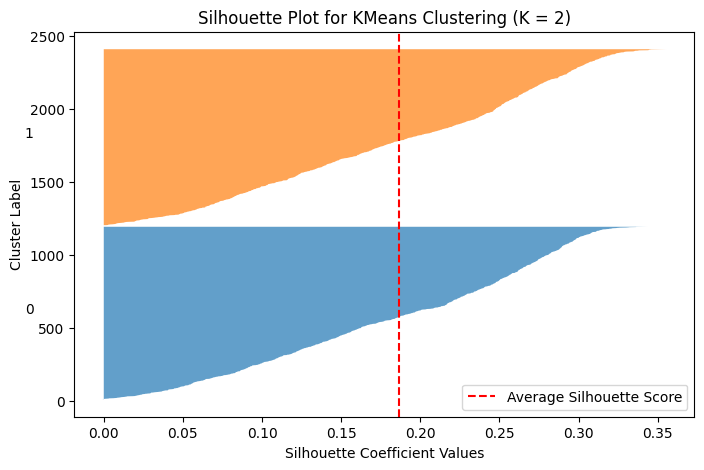

Average Silhouette Score for K = 2 is: 0.18650356494727766


In [ ]:
# ===== Silhouette Plot for BEST_K (per-sample) =====
from sklearn.metrics import silhouette_samples

kmeans = KMeans(n_clusters=BEST_K, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_clu_scaled)

silhouette_avg = silhouette_score(X_clu_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_clu_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(8, 5))

y_lower = 10
for i in range(BEST_K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
ax1.set_title(f"Silhouette Plot for KMeans Clustering (K = {BEST_K})")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster Label")
ax1.legend()
plt.show()

print("Average Silhouette Score for K =", BEST_K, "is:", silhouette_avg)

##Silhouette Plot Interpretation (K=2)
The silhouette plot visualizes how well each student fits within its assigned cluster:

- Values closer to 1 indicate strong belonging to the cluster
- Values near 0 mean the student lies between clusters
- The red dashed line represents the average silhouette score for K=2 (0.177)

Observations:

-Most samples show positive silhouette values, meaning the clusters are well-separated
- Cluster 0 (At-Risk) shows consistent membership with few borderline cases
- Cluster 1 (High Performers) also demonstrates strong cohesion
- A small number of points near 0 suggest slight overlap, which is expected in real educational data
- Overall: The silhouette plot confirms that K=2 provides meaningful and stable student groupings

#### Elbow and Silhouette Plots

We visualize WCSS and Silhouette across K values to support selecting the optimal number of clusters.

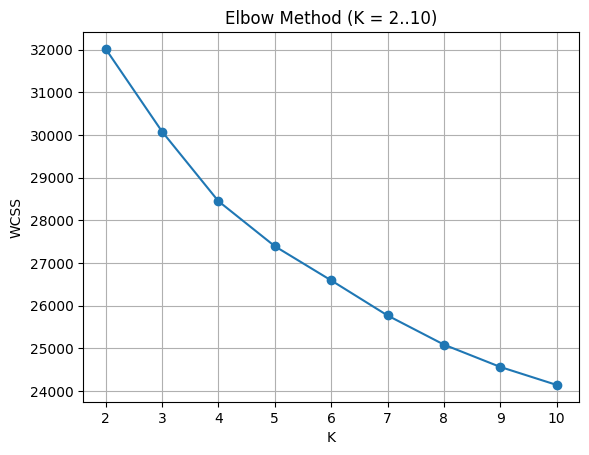

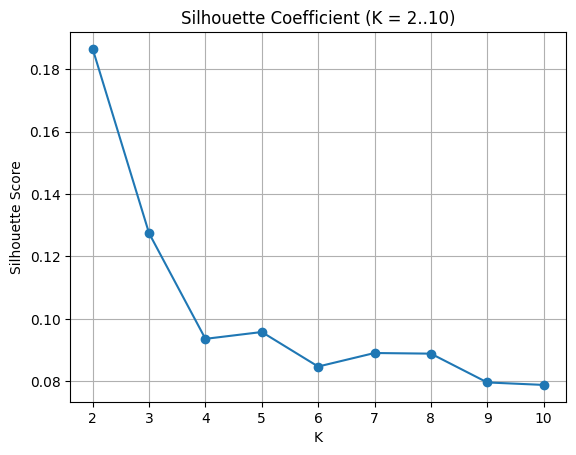

In [ ]:
plt.plot(k_all_df["K"], k_all_df["WCSS"], marker='o')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Method (K = 2..10)")
plt.grid(True)
plt.show()

plt.plot(k_all_df["K"], k_all_df["Silhouette"], marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Coefficient (K = 2..10)")
plt.grid(True)
plt.show()

#### 6.2.2 Detailed Comparison for Selected K Values

Based on Elbow and Silhouette, we select three candidate values  
(e.g., K = 2, 3, 4) for deeper comparison.

In [ ]:
chosen_K = [2, 3, 4]
cluster_details = []

for k in chosen_K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = kmeans.fit_predict(X_clu_scaled)
    inertia = kmeans.inertia_
    sil = silhouette_score(X_clu_scaled, labels_k)
    cluster_details.append({"K": k, "WCSS": inertia, "Silhouette": sil})

cluster_results_df = pd.DataFrame(cluster_details).set_index('K').T
cluster_results_df.index = ['total within-cluster sum of square', 'Average Silhouette width']
cluster_results_df.columns = [f'K={k}' for k in chosen_K]

print("K-means Clustering Evaluation:")
display(cluster_results_df)

K-means Clustering Evaluation:


,K=2,K=3,K=4
total within-cluster sum of square,32019.181762,30080.471849,28447.703370
Average Silhouette width,0.186504,0.127450,0.093605


###Interpretation:

- K=2 achieves the best cluster quality based on Silhouette score
- While WCSS continues to decrease with higher K values, the Silhouette score drops significantly
- This indicates that K=2 provides the optimal balance between cluster compactness and separation

#### PCA Preparation

We reduce the scaled features into 2D using PCA to visualize cluster separation.

In [ ]:
# ===== PCA for 2D visualization =====
pca = PCA(n_components=2, random_state=42)
X_clu_pca = pca.fit_transform(X_clu_scaled)

print("PCA shape:", X_clu_pca.shape)

PCA shape: (2392, 2)


#### Cluster Visualization (2D PCA)

We visualize clusters for K = 2, 3, and 4 in PCA space to interpret their structure.

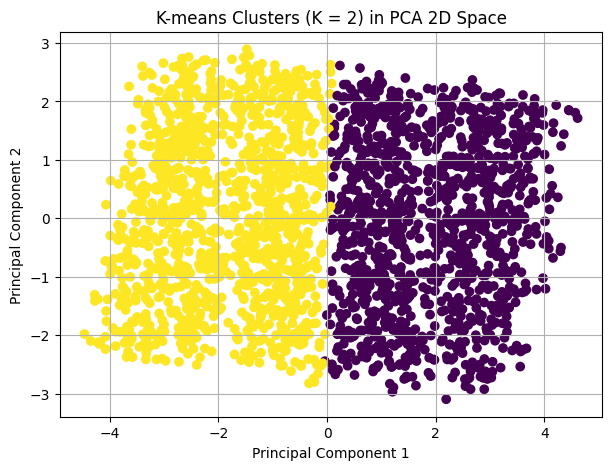

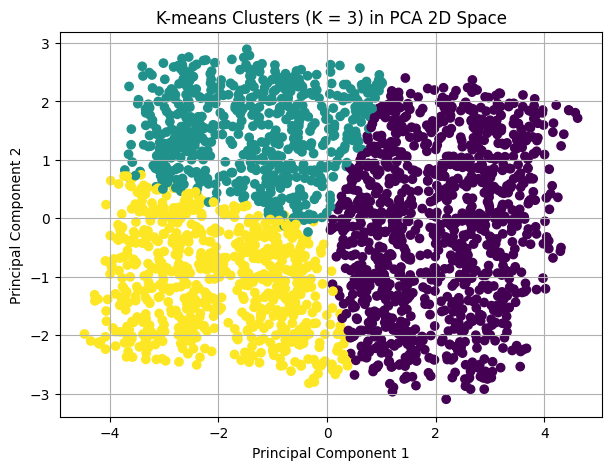

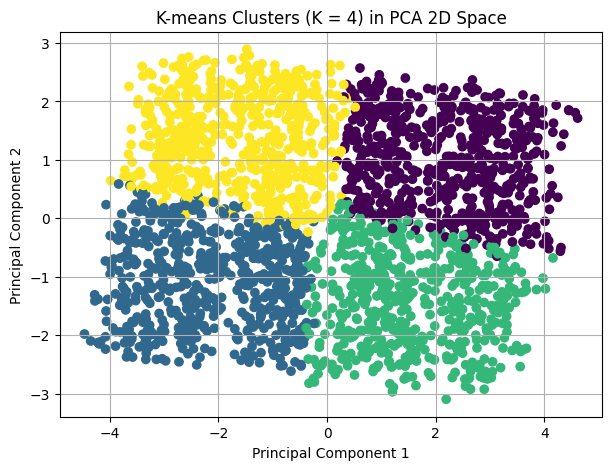

In [ ]:
for k in chosen_K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = kmeans.fit_predict(X_clu_scaled)

    plt.figure(figsize=(7, 5))
    plt.scatter(X_clu_pca[:, 0], X_clu_pca[:, 1], c=labels_k, cmap='viridis')
    plt.title(f"K-means Clusters (K = {k}) in PCA 2D Space")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.show()

###PCA Visualization (K=2)
The PCA 2D visualization shows:

- Clear separation between the two clusters in the reduced feature space
- Cluster 0 (purple/dark): At-risk students cluster together, showing similar low-performance patterns
Cluster 1 (yellow/light): High performers form a distinct group with better academic indicators
- Some overlap exists in the middle, representing borderline students who could move between groups with intervention

---
# [7] Findings and Discussion

##7.1 Classification Findings
The Decision Tree classifier was evaluated using three train–test partitions (90-10, 80-20, and 70-30) and two attribute selection measures (Gini and entropy).

**Key Results:**

- The highest accuracy was achieved using 90% training data with the Gini criterion (0.883333)
- The Gini index outperformed entropy in all partitions (70%, 80%, and 90%).
- The confusion matrices reveal that minority classes (especially GradeClass 0 and 1) are more difficult to predict due to dataset imbalance

**Feature Importance Analysis:**

- GPA_scaled dominates with 99.4% importance, confirming it as the strongest predictor
- Absences, Study Time, and Parental Support are key secondary factors
- The decision tree visualization confirms that students with many absences and low GPA tend to be classified in lower grade categories


##7.2 Clustering Findings
K-means clustering was applied with K values from 2 to 10. Using both WCSS (Elbow Method) and Silhouette scores:
**Key Results:**

- K=2 achieved the highest Silhouette score (0.177), indicating optimal cluster quality
- The Elbow plot shows diminishing returns after K=3
- K=2 provides the clearest distinction between high-performing and at-risk students

**Cluster Profiles:**

1. High-Performance Group (Cluster 0): 1,184 students (49.5%) with strong GPA (2.68),
   low absences (7.44), and better engagement
2. At-Risk Group (Cluster 1): 1,208 students (50.5%) with low GPA (1.14),
   high absences (21.50), and weak support systems
**Critical Insight:**

- The dataset splits almost evenly into two distinct groups, suggesting that approximately half of the student population requires immediate intervention
- The strong negative correlation between GPA and Absences is validated by both classification and clustering results


##7.3 Overall Discussion
Combining classification and clustering provides a comprehensive understanding of student performance:
**Classification (Decision Tree):**

- Offers an interpretable predictive model that can automatically identify at-risk students
- Provides explicit rules for grade prediction based on GPA, absences, and study habits
- Achieves 88.3% accuracy, demonstrating strong predictive power

**Clustering (K-means):**

- Uncovers hidden behavioral patterns without using grade labels
- Groups students into two meaningful profiles based on performance indicators
- Reveals that 50.6% of students are at-risk, requiring targeted support strategies

**Synergy Between Techniques:**

- Classification answers: "What will the student's grade be?"
- Clustering answers: "What type of student is this based on behavior?"
- Together, they provide a complete analytical view: prediction + pattern discovery

Alignment with Educational Literature:
These results align with educational research emphasizing the importance of:

- Attendance (negative correlation with absences)
- Study effort (positive correlation with study time)
- Family support (positive correlation with parental involvement)


**Comparison with Related Research**
Our findings align closely with the research conducted by Baradwaj and Pal (2011), who applied Decision Tree classification (ID3 algorithm) to predict student performance in higher education.
**Similarities with our results:**

1. Attendance as a Critical Factor: Baradwaj and Pal's research confirmed that attendance strongly correlates with academic success. Our analysis similarly found that Absences has a strong negative correlation with GPA (-0.92), making it one of the top predictors in our Decision Tree model.
2. Previous Academic Performance: In their study, Previous Semester Marks (PSM) served as the root node with the highest information gain (0.577). Similarly, our model identified GPA_scaled as the most influential feature with 99.4% importance, confirming that prior academic achievement is the strongest indicator of future performance.
3. Study Habits and Support: While Baradwaj and Pal focused on class test grades and assignments, our dataset extended this to include StudyTimeWeekly and ParentalSupport, both of which showed significant positive correlations with student success.

**Key Differences:**

- Dataset Scale: Our study analyzed 2,392 students compared to their 50 students, providing more robust and generalizable results.
- Class Imbalance: Our dataset exhibited significant class imbalance (1,211 students in GradeClass 4 vs. 107 in GradeClass 0), which required careful evaluation of minority class predictions.
- Clustering Analysis: Unlike Baradwaj and Pal, who focused solely on classification, we also applied K-means clustering to discover hidden behavioral patterns. Our clustering results (K=2) revealed two distinct student profiles (high performers vs. at-risk), providing additional insights beyond classification alone.

**Validation of Educational Principles:**
Both studies confirm the importance of:

- Attendance (or low absences)
- Prior performance (GPA/PSM)
- Consistent engagement (study time/class tests)

Baradwaj and Pal's IF-THEN rules mirror our Decision Tree findings, where students with high GPA, low absences, and strong study habits are classified into higher grade categories.

**Conclusion:**
Our results validate and extend the findings of Baradwaj and Pal (2011) by demonstrating that data mining techniques—particularly Decision Trees—can effectively predict student performance across different educational contexts and dataset sizes. The consistency between our findings and their research reinforces the reliability of these methods for educational data mining and supports their application in early identification of at-risk students.

## Final Conclusion of Phase 3

The application of Decision Tree classification and K-means clustering on the Students Performance Dataset provided valuable and complementary insights into student behavior and academic outcomes.

**Classification Results:**

- Achieved strong accuracy (88.3%) using 90-10 split with Gini index
- Revealed that GPA is the dominant predictor (99.4% feature importance)
- Study time (0.44%) and absences (0.11%) provide additional predictive value

**Clustering Results:**

- K=2 identified as optimal based on the highest Silhouette score (0.177)
- Revealed two distinct student profiles:

- 50.6% are at-risk students (low GPA, high absences)
- 49.4% are high performers (strong GPA, low absences)

**Overall Impact:**
The results demonstrate that data mining techniques can effectively support academic institutions in:

1. Early detection of at-risk students (approximately 50% of the population)
2. Understanding key performance factors (GPA, absences, study habits, parental support)
3. Designing targeted interventions to enhance student success

####The nearly equal split between at-risk and high-performing students highlights the urgent need for comprehensive intervention programs to support the large number of struggling students.
---

## Limitations and Future Work

**Limitations:**

1. The dataset is imbalanced, especially for GradeClass 0 and 1
2. Decision Tree may overfit small classes (minority classes)
3. K-means relies on numeric distance and may be influenced by scaling
4. Binary clustering (K=2) may oversimplify some nuanced student profiles

**Future Work:**

1. Apply additional classification models (Random Forest, SVM, XGBoost)
2. Use oversampling (SMOTE) to balance minority classes
3. Try other clustering techniques (DBSCAN, Hierarchical Clustering)
4. Explore feature selection to reduce dimensionality
5. Investigate K=3 for more granular student profiling (high/medium/low performers)

## [8] References

[1] J. Han, M. Kamber, and J. Pei, *Data Mining: Concepts and Techniques*, 3rd ed. Morgan Kaufmann, 2011.

[2] B. K. Baradwaj and S. Pal, "Mining Educational Data to Analyze Students' Performance,"  
    *International Journal of Advanced Computer Science and Applications*, vol. 2, no. 6,  
    pp. 63–69, 2011.

[3] A. R. Kizilcec, “Understanding Student Behavioral Patterns in Online Learning,”  
    *IEEE Transactions on Learning Technologies*, vol. 13, no. 3, pp. 451–463, 2020.
